![](http://https://upload.wikimedia.org/wikipedia/commons/thumb/0/01/Erythema_migrans_-_erythematous_rash_in_Lyme_disease_-_PHIL_9875.jpg/310px-Erythema_migrans_-_erythematous_rash_in_Lyme_disease_-_PHIL_9875.jpg)

## Libraries

In [1]:
import pandas as pd
import numpy as np 
from numpy import asarray
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.models import Sequential, Model 
from keras.optimizers import SGD, Adam
from keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array
import keras
import os

##  Data Preprocessing

In [4]:
# load the image
image1 = Image.open('D:/Personal files/Data science and AI/Kaggle/Lyme Disease Classification/RashData/Validation/Validation_2_Cases/Lyme_Positive/erythema migrans30.jpg')

# summarize some details about the image
print(image1.format)
print(image1.mode)
print(image1.size)

# load the image
image2 = Image.open('D:\Personal files\Data science and AI\Kaggle\Lyme Disease Classification\RashData\Lyme_Negative_By_Disease\Drug Rash/fixed drug reaction18.jpg')

# summarize some details about the image
print(image2.format)
print(image2.mode)
print(image2.size)
pixels = asarray(image1)

JPEG
RGB
(311, 480)
JPEG
RGB
(380, 285)


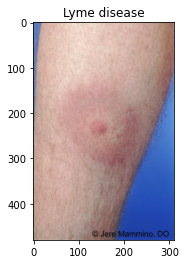

In [14]:
plt.title('Lyme disease')
imgplot = plt.imshow(image1)
plt.show()

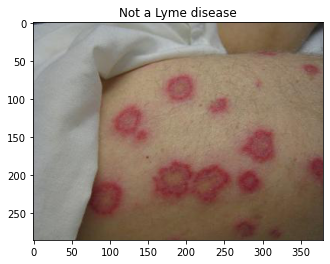

In [18]:
plt.title('Not a Lyme disease')
imgplot = plt.imshow(image2)
plt.show()

In [4]:
TRAIN_DIR = 'D:/Personal files/Data science and AI/Kaggle/Lyme Disease Classification/RashData/Train/Train_2_Cases'

TEST_DIR = 'D:/Personal files/Data science and AI/Kaggle/Lyme Disease Classification/RashData/Validation/Validation_2_Cases'

In [5]:
HEIGHT = 128
WIDTH = 128

BATCH_SIZE = 8
class_list = ["class_1", "class_2"]
FC_LAYERS = [1024, 512, 256]
dropout = 0.5
NUM_EPOCHS = 100
BATCH_SIZE = 8

In [6]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   rotation_range = 90,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.1,)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                  rotation_range = 90,
                                  horizontal_flip = True,
                                  vertical_flip = False)

In [7]:
train_generator = train_datagen.flow_from_directory(TRAIN_DIR,
                                                    target_size = (HEIGHT, WIDTH),
                                                    batch_size = BATCH_SIZE)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size = (HEIGHT, WIDTH),
                                                  batch_size = BATCH_SIZE)

Found 357 images belonging to 2 classes.
Found 87 images belonging to 2 classes.


## Modeling (Resnet 50)

In [8]:
def build_model(base_model, dropout, fc_layers, num_classes):
    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = Flatten()(x)
    for fc in fc_layers:
        print(fc)
        x = Dense(fc, activation='relu')(x)
        x = Dropout(dropout)(x)
    preditions = Dense(num_classes, activation='softmax')(x)
    finetune_model = Model(inputs = base_model.input, outputs = preditions)
    return finetune_model

base_model_1 = ResNet50(weights = 'imagenet',
                       include_top = False,
                       input_shape = (HEIGHT, WIDTH, 3))

resnet50_model = build_model(base_model_1,
                                      dropout = dropout,
                                      fc_layers = FC_LAYERS,
                                      num_classes = len(class_list))

adam = Adam(lr = 0.00001)
resnet50_model.compile(adam, loss="binary_crossentropy", metrics=["accuracy"])

filepath = "./checkpoints" + "RestNet50" + "_model_weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor = ["acc"], verbose= 1, mode = "max")
cb=TensorBoard(log_dir=("/home/ubuntu/"))
callbacks_list = [checkpoint, cb]

#print(train_generator.class_indices)

resnet50_model.summary()

C:\ProgramData\Anaconda3\envs\gputest\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


1024
512
256
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 64, 64, 64)   256         conv1[0][0]                      
_______________________________________________________________________________

In [9]:
history = resnet50_model.fit_generator(generator = train_generator, epochs = NUM_EPOCHS, steps_per_epoch = 100, 
                                       shuffle = True, validation_data = test_generator)

Epoch 1/100


C:\ProgramData\Anaconda3\envs\gputest\lib\site-packages\PIL\Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


100/100 [==============================] - 14s 142ms/step - loss: 1.7123 - accuracy: 0.5239 - val_loss: 1.2630 - val_accuracy: 0.5172
Epoch 2/100
100/100 [==============================] - 9s 87ms/step - loss: 1.5300 - accuracy: 0.5626 - val_loss: 1.3226 - val_accuracy: 0.4828
Epoch 3/100
100/100 [==============================] - 9s 90ms/step - loss: 1.4668 - accuracy: 0.5227 - val_loss: 1.1703 - val_accuracy: 0.5287
Epoch 4/100
100/100 [==============================] - 9s 89ms/step - loss: 1.2655 - accuracy: 0.5718 - val_loss: 1.1361 - val_accuracy: 0.5057
Epoch 5/100
100/100 [==============================] - 9s 91ms/step - loss: 1.2824 - accuracy: 0.5189 - val_loss: 0.8753 - val_accuracy: 0.5747
Epoch 6/100
100/100 [==============================] - 10s 100ms/step - loss: 1.1439 - accuracy: 0.5743 - val_loss: 1.0350 - val_accuracy: 0.5862
Epoch 7/100
100/100 [==============================] - 10s 96ms/step - loss: 1.0649 - accuracy: 0.5879 - val_loss: 0.7193 - val_accuracy: 0.6552

Epoch 57/100
100/100 [==============================] - 10s 99ms/step - loss: 0.5257 - accuracy: 0.7519 - val_loss: 0.3586 - val_accuracy: 0.7011
Epoch 58/100
100/100 [==============================] - 9s 94ms/step - loss: 0.5167 - accuracy: 0.7531 - val_loss: 0.2187 - val_accuracy: 0.7126
Epoch 59/100
100/100 [==============================] - 10s 98ms/step - loss: 0.5162 - accuracy: 0.7632 - val_loss: 0.7966 - val_accuracy: 0.7011
Epoch 60/100
100/100 [==============================] - 10s 102ms/step - loss: 0.5468 - accuracy: 0.7481 - val_loss: 1.0368 - val_accuracy: 0.7241
Epoch 61/100
100/100 [==============================] - 10s 105ms/step - loss: 0.4758 - accuracy: 0.7758 - val_loss: 0.0329 - val_accuracy: 0.7816
Epoch 62/100
100/100 [==============================] - 10s 104ms/step - loss: 0.5132 - accuracy: 0.7370 - val_loss: 0.4292 - val_accuracy: 0.7471
Epoch 63/100
100/100 [==============================] - 10s 99ms/step - loss: 0.4862 - accuracy: 0.7720 - val_loss: 0.4411

In [10]:
resnet50_model.save("model.h5")

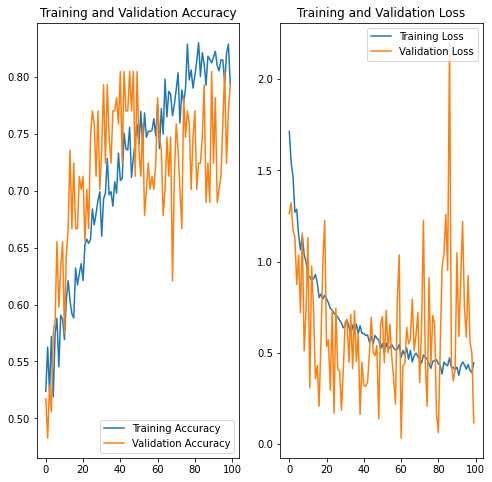

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()